In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from scipy import signal
from scipy.io import wavfile

from IPython.display import Audio, display

%matplotlib inline

In [2]:
# Matplotlib settings to make the plots look a little nicer.

plt.rcParams['font.size']      = 18
plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
def play(x, fs, autoplay=False, normalize=True):
    display(Audio(x, rate=fs, autoplay=autoplay, normalize=normalize))

In [4]:
def norm(wav):
    ''' Normalization function '''
    return wav/np.max(np.abs(wav))

In [5]:
def extract(wav, t1, t2, fs):
    ''' Extract a portion of the input signal from t1 to t2 '''
    cut = wav[t1*fs:t2*fs]
    tcut = np.arange(len(cut))*(1./fs)
    return cut, tcut

In [6]:
def plot_signal(time_vec,x_0,xlim=None,title=None):
    fig = plt.figure(figsize=(15,12))

    ax = fig.add_subplot(2,1,1)
    ax.plot(time_vec,x_0)
    ax.set_xticklabels([])
    ax.set_ylabel('x(t)')
    ax.set_xlim(xlim)
    ax.set_title(title)

    ax = fig.add_subplot(2,1,2)
    samplerate = 1./(time_vec[1]-time_vec[0])
    ax.specgram(x_0,Fs=samplerate)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Hz')
    ax.set_xlim(xlim)

    fig.tight_layout()
    plt.show()
    plt.close(fig)

In [7]:
def plot_correlation(tau, Rxx, title = None):
    fig = plt.figure(figsize=(15,8))
    
    ax = fig.add_subplot(1,1,1)
    ax.plot(tau,Rxx)
    ax.set_xlabel('Tau [s]')
    ax.set_ylabel('Rxx')
    ax.set_title(title)
    
    plt.show()
    plt.close(fig)
  

In [52]:
def plot_magphase(b, a, fs, title = None):
    
    w, h = signal.freqz(b, a)

    f = (fs/2)*(w/(np.pi))
    
    fig = plt.figure(figsize=(15,12))

    ax1 = fig.add_subplot(2,1,1)
    
    ax1.plot(f, 20 * np.log10(abs(h)))
    ax1.set_xscale('log')
    ax1.set_title(title)
    ax1.set_xlabel('Frequency [Hz]')
    ax1.set_ylabel('Amplitude [dB]')  
    ax1.grid(which='both', axis='both')
    ax1.axvline(Wn[0], color='green') # cutoff frequency
    ax1.axvline(Wn[1], color='green') # cutoff frequency

#plt.ylim(-6,0)

    ax2 = fig.add_subplot(2,1,2)
   
    ax2.plot(f, np.unwrap(np.angle(h)))
    ax2.set_xscale('log')
    ax2.set_title(title)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Phase [rad]')
    ax2.grid(which='both', axis='both')
    ax2.axvline(Wn[0], color='green') # cutoff frequency
    ax2.axvline(Wn[1], color='green') # cutoff frequency

    plt.tight_layout()
    plt.show()
    
    

# Load manufactured signal

In [8]:
fname = 'test.wav'

# Load in the file and detect the sampling frequency
fs_wav0, wav0 = wavfile.read(fname)

# Create a time vector
t_wav0 = np.arange(len(wav0))*(1./fs_wav0)

In [9]:
# Using the sounddevice library, we can hear what the sinusoid sounds like if played as
play(wav0, fs_wav0)

In [10]:
# Normalize the data
wav0_n = norm(wav0)
wav0_n

array([-0.00354015, -0.00399792, -0.00436415, ...,  0.        ,
        0.        ,  0.        ])

/Users/vaibhavipatel/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


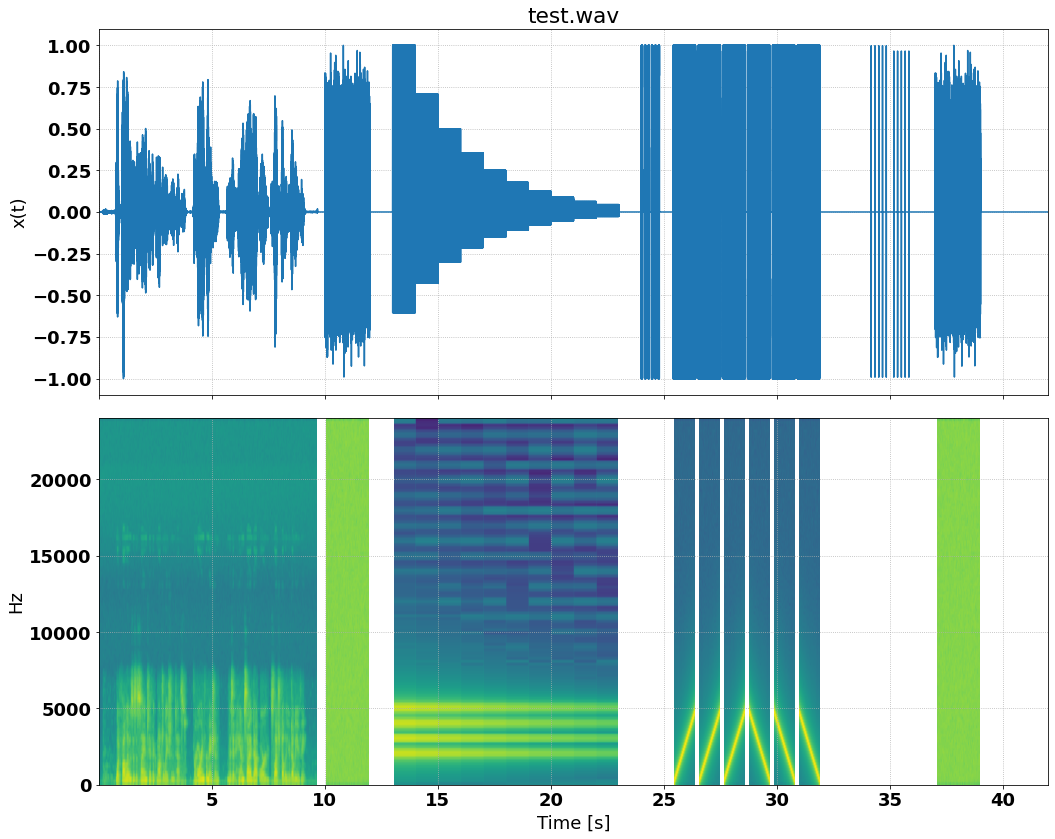

In [11]:
plot_signal(t_wav0, wav0_n, title="test.wav")

# Extract white nosie

In [12]:
# Extract the white noise
white_noise, t_white_noise = extract(wav0_n, 10, 12, fs_wav0)

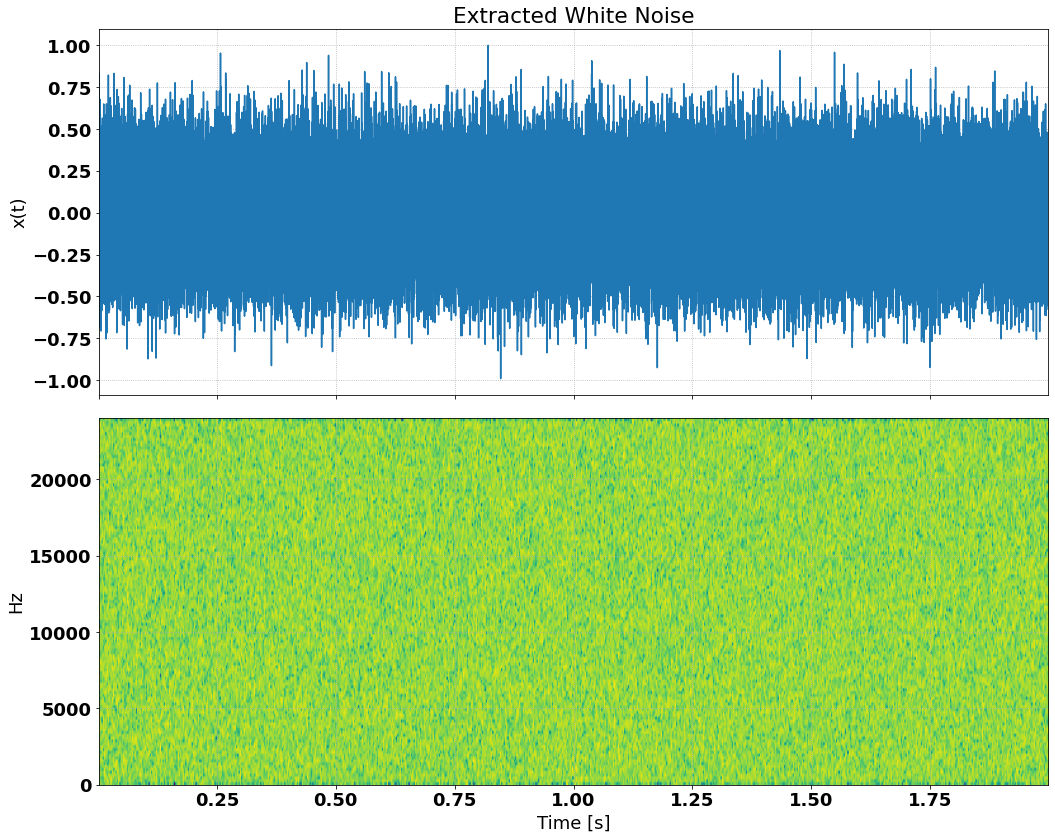

In [13]:
plot_signal(t_white_noise, white_noise, title="Extracted White Noise")

In [14]:
Rxx = np.correlate(wav0_n,white_noise,mode='same')
tau = np.arange(len(Rxx))*(1./fs_wav0)

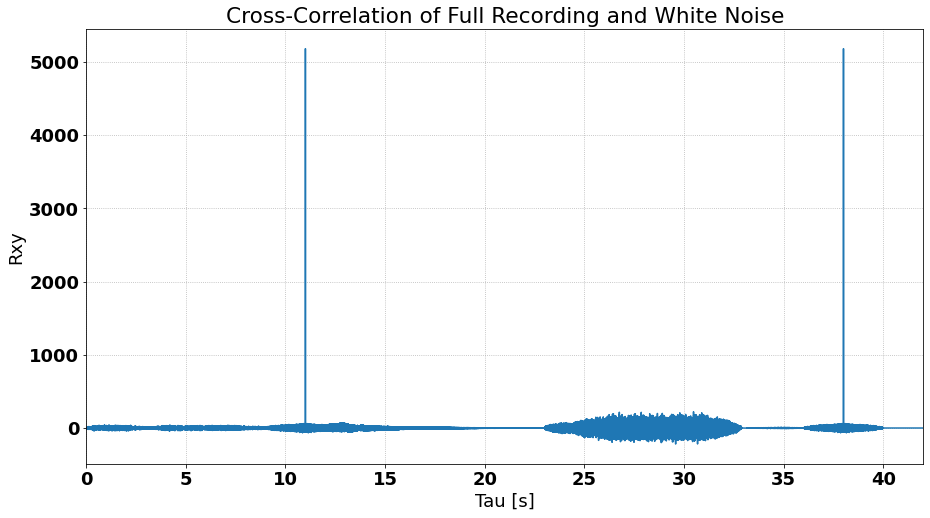

In [15]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.plot(tau,Rxx)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of Full Recording and White Noise')

plt.show()
plt.close(fig)

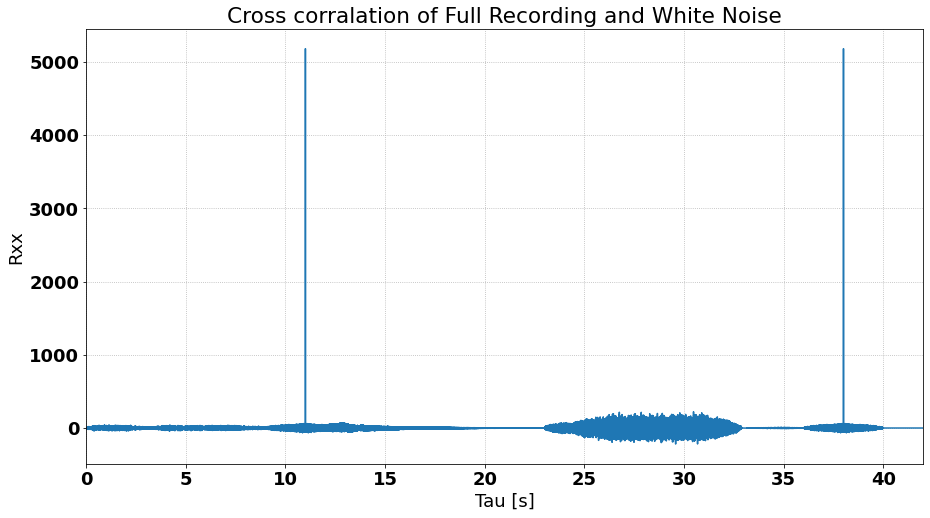

In [16]:
plot_correlation(tau, Rxx, title = 'Cross corralation of Full Recording and White Noise')

# Extract Chirps

In [17]:
chirps, t_chirps = extract(wav0_n, 24, 32, fs_wav0)

/Users/vaibhavipatel/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


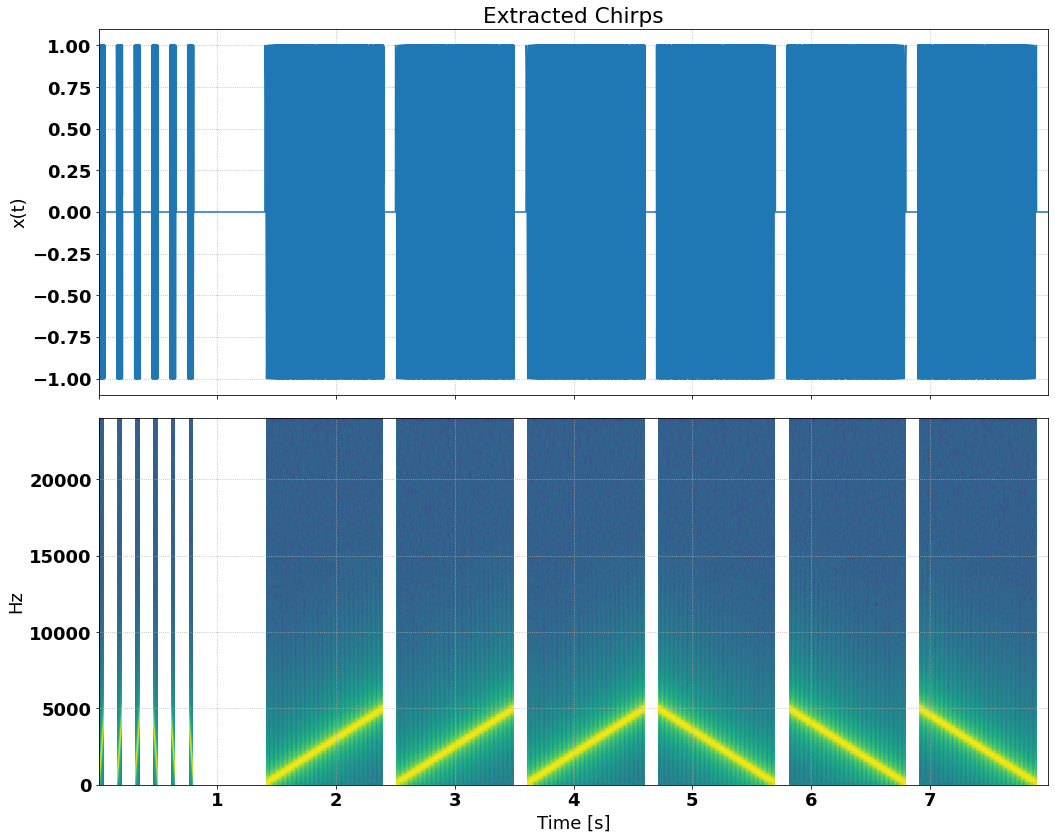

In [18]:
plot_signal(t_chirps, chirps, title="Extracted Chirps")

In [19]:
Rxy = np.correlate(wav0_n, chirps, mode='same')
tau = np.arange(len(Rxy))*(1./fs_wav0)

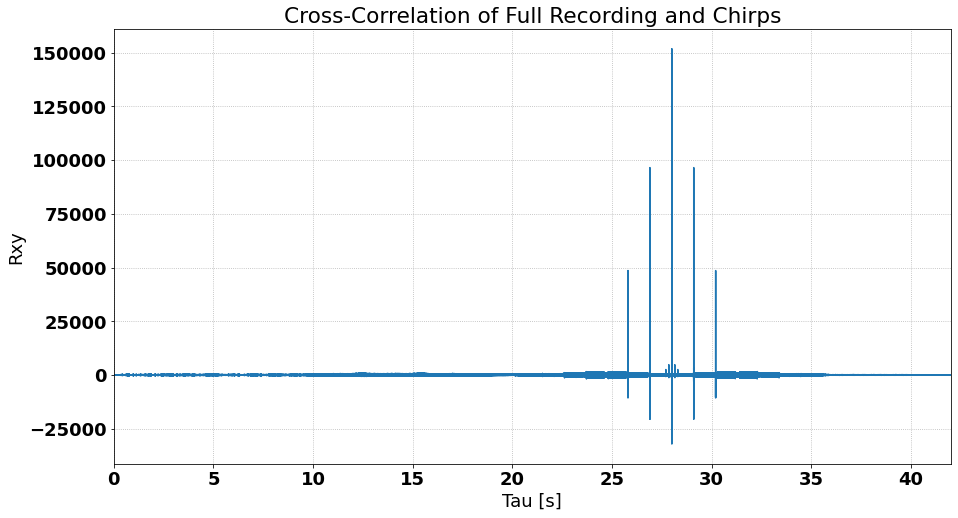

In [20]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.plot(tau,Rxy)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of Full Recording and Chirps')

plt.show()
plt.close(fig)

# Correlate the Extracted Signals with the Collected Signals

In [21]:
fname1 = 'AMDEMOD-N6GN_20211115T190749_iq_15.wav'

# Load in the file and detect the sampling frequency
fs_wav1, wav1 = wavfile.read(fname1)

# Create a time vector
t_wav1 = np.arange(len(wav1))*(1./fs_wav1)

In [22]:
# Normalize the data
wav1_n = norm(wav1)

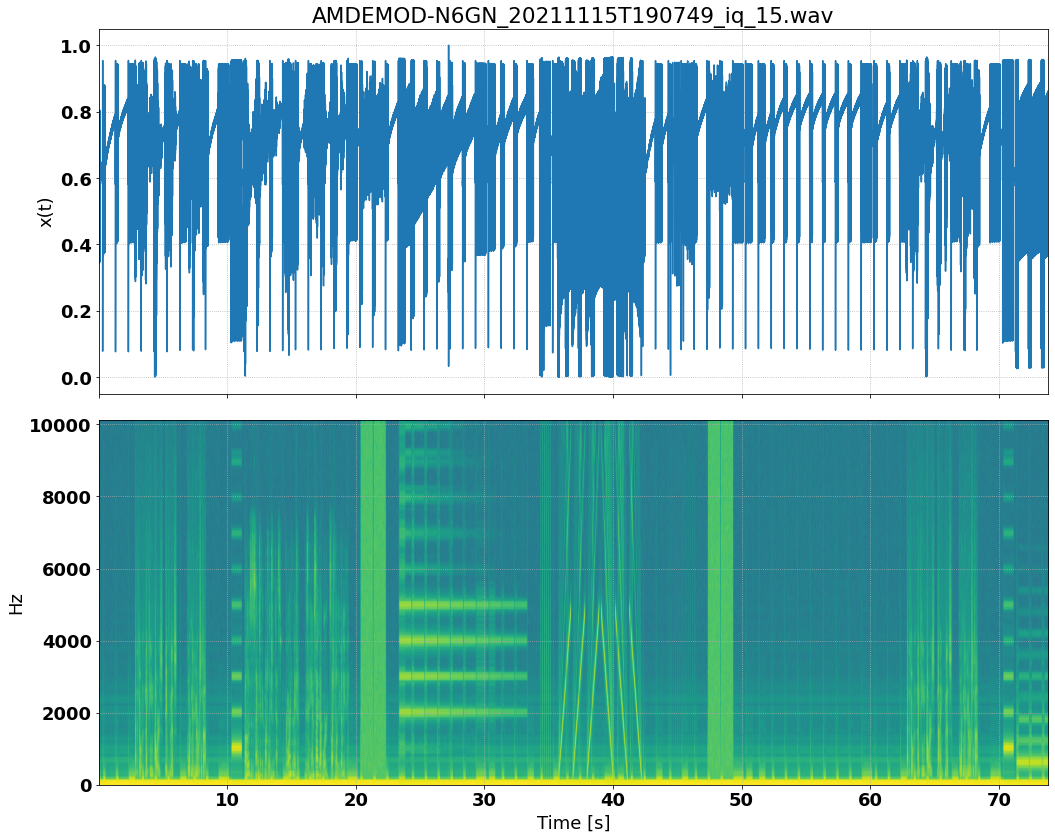

In [23]:
plot_signal(t_wav1, wav1_n, title=fname1)

In [24]:
Rxx = np.correlate(wav1_n, chirps, mode='same')

In [25]:
tau = np.arange(len(Rxx))*(1./fs_wav1)

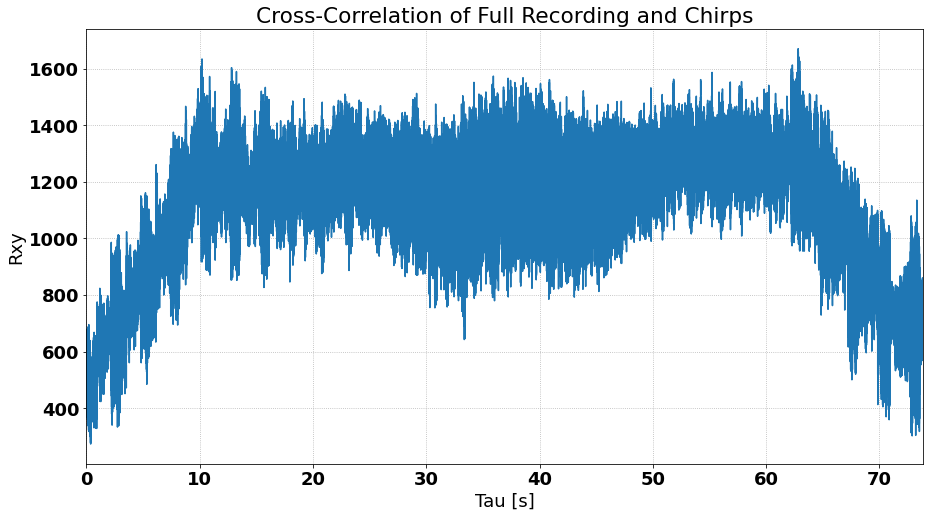

In [26]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.plot(tau,Rxx)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of Full Recording and Chirps')

plt.show()
plt.close(fig)

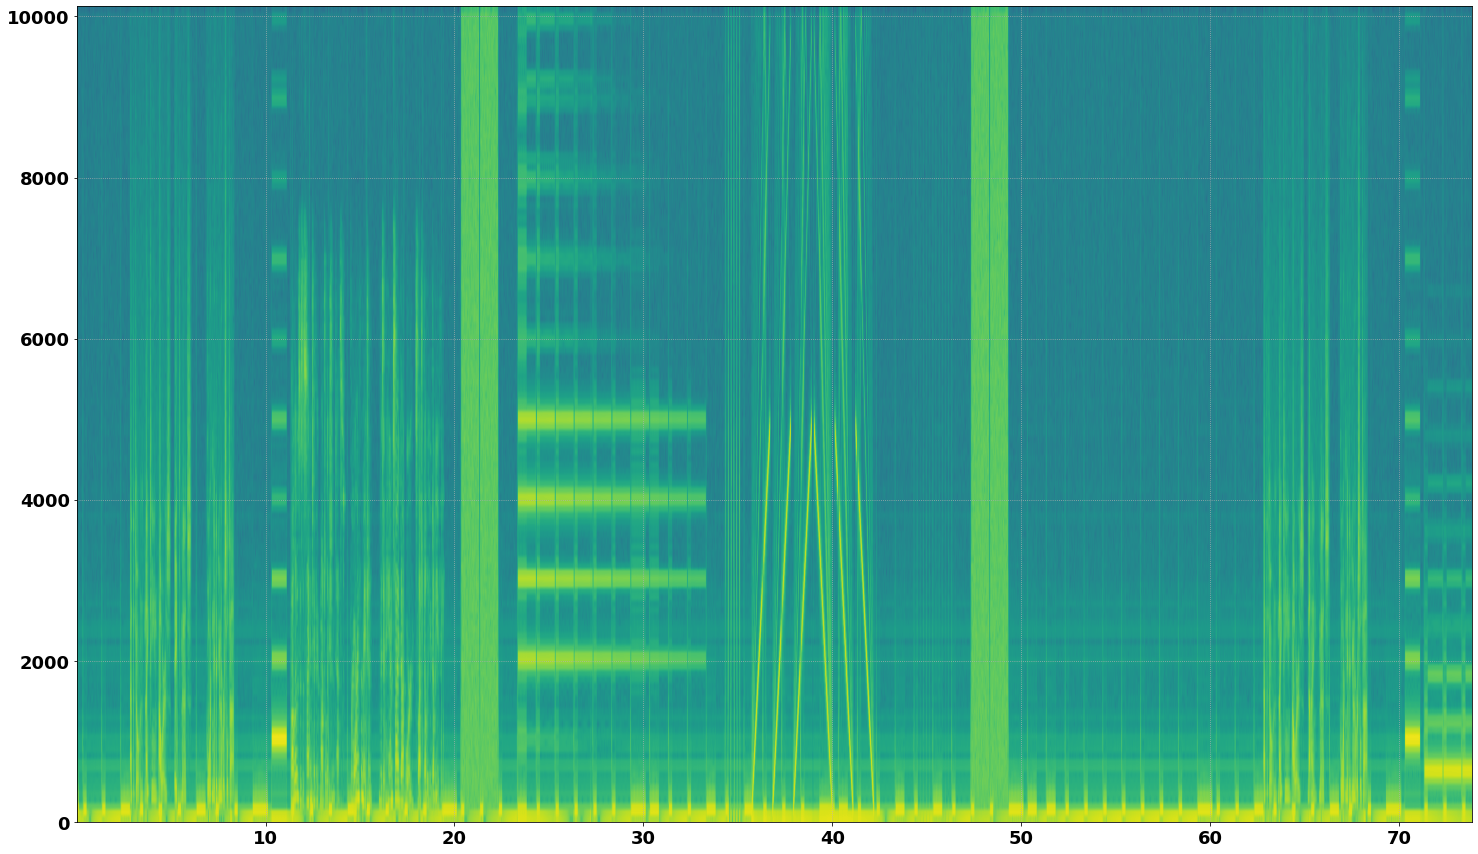

In [27]:
wav1_clean = wav1_n - np.mean(wav1_n)

fig = plt.figure(figsize=(25,15))

plt.specgram(wav1_clean,Fs=fs_wav1)
plt.show()

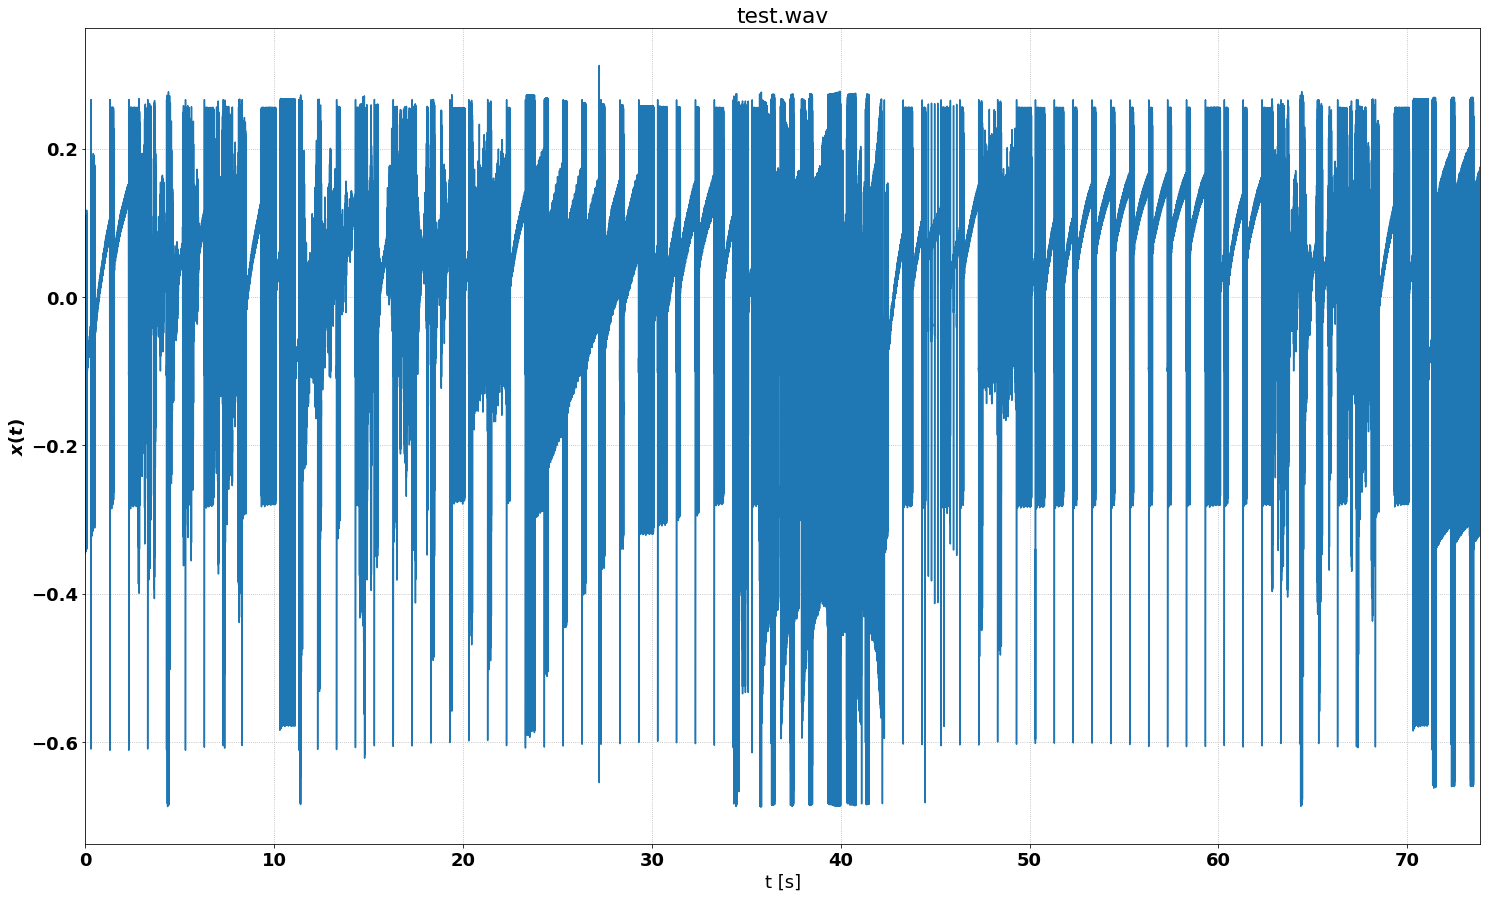

In [28]:
fig = plt.figure(figsize=(25,15))

ax  = fig.add_subplot(1,1,1)
ax.plot(t_wav1,wav1_clean)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x(t)$')
ax.set_title(fname)
plt.show()

In [29]:
meanVal = np.mean(wav1_n)
wav1vs0 = np.correlate(wav1_n - meanVal,test_wav - meanVal,mode='same')

NameError: name 'test_wav' is not defined

In [30]:
fs_wav1

20249

NameError: name 'wav1vs0' is not defined

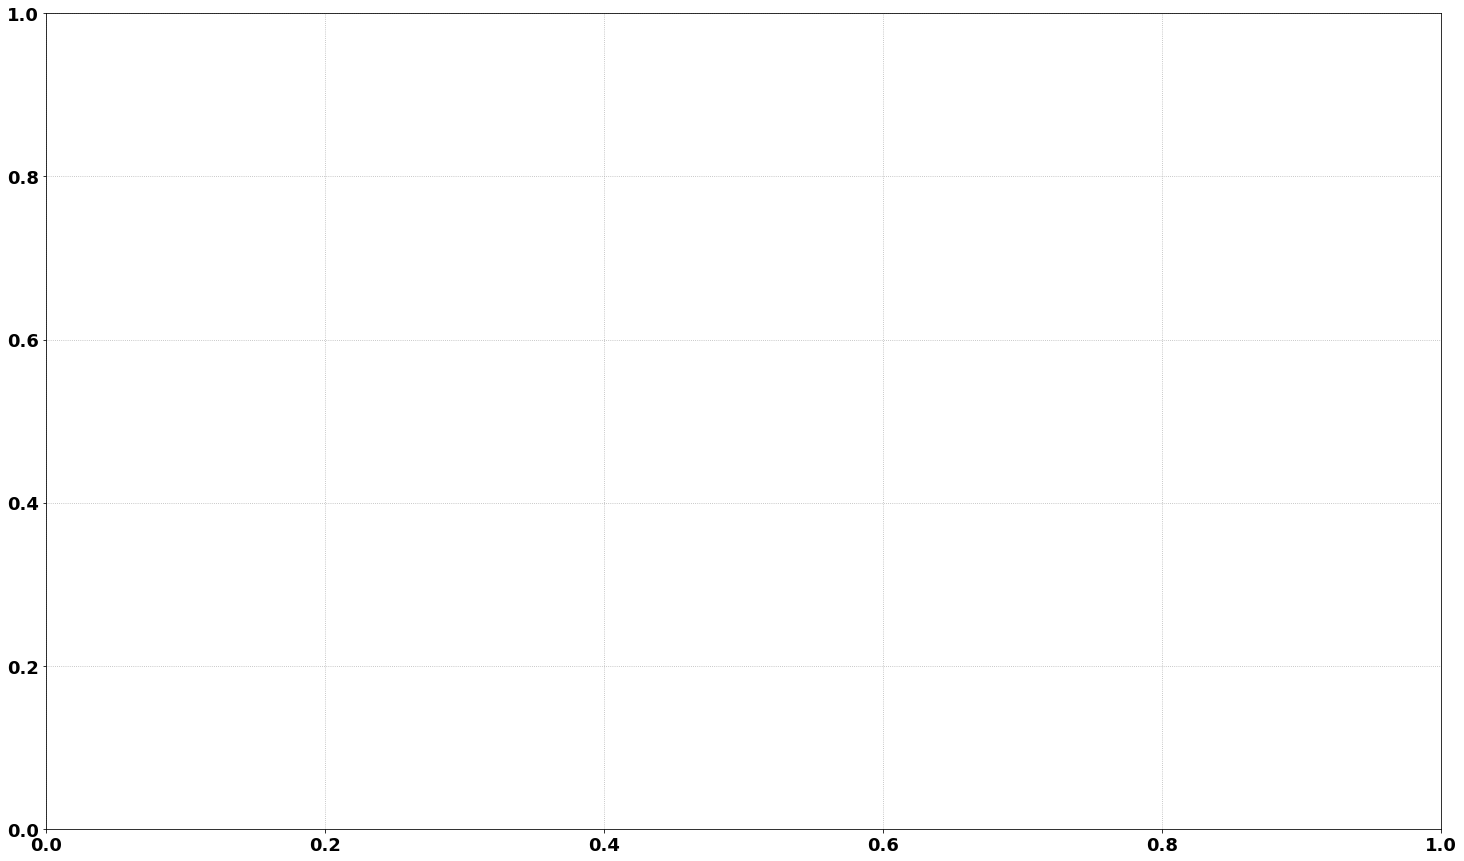

In [31]:
fig = plt.figure(figsize=(25,15))

ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(wav1vs0))*(1./fs_wav1),wav1vs0)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of Full Recording and White Noise')

plt.show()
plt.close(fig)

# Attempt at Butterworth

In [ ]:
N, Wn = signal.buttord(6000,6500,3,120,fs=fs_wav1)

In [ ]:
N, Wn

In [ ]:
sos = signal.butter(N,Wn, 'hp', fs=fs_wav1, output='sos')

In [ ]:
filtered_recording = signal.sosfilt(sos, test_wav)

In [ ]:
filtered_whitenoise = signal.sosfilt(sos, t_wav0)

In [ ]:
filtered_correlation = np.correlate(filtered_recording,filtered_whitenoise,mode='same')

In [ ]:
play(filtered_recording, fs_wav1)

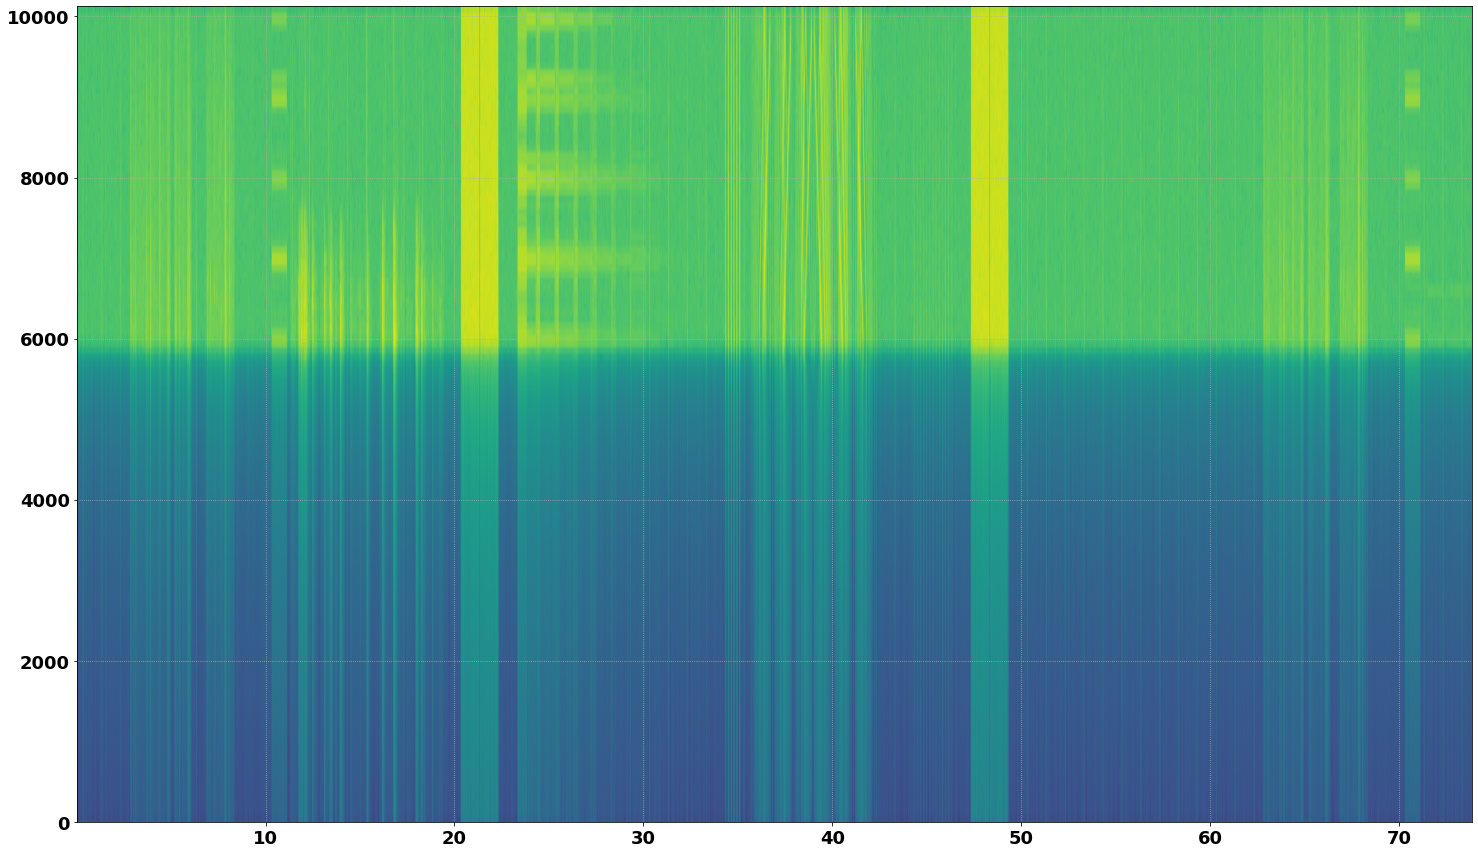

In [39]:
fig = plt.figure(figsize=(25,15))

plt.specgram(filtered_recording,Fs=fs_wav1)
plt.show()

NameError: name 'filtered_correlation' is not defined

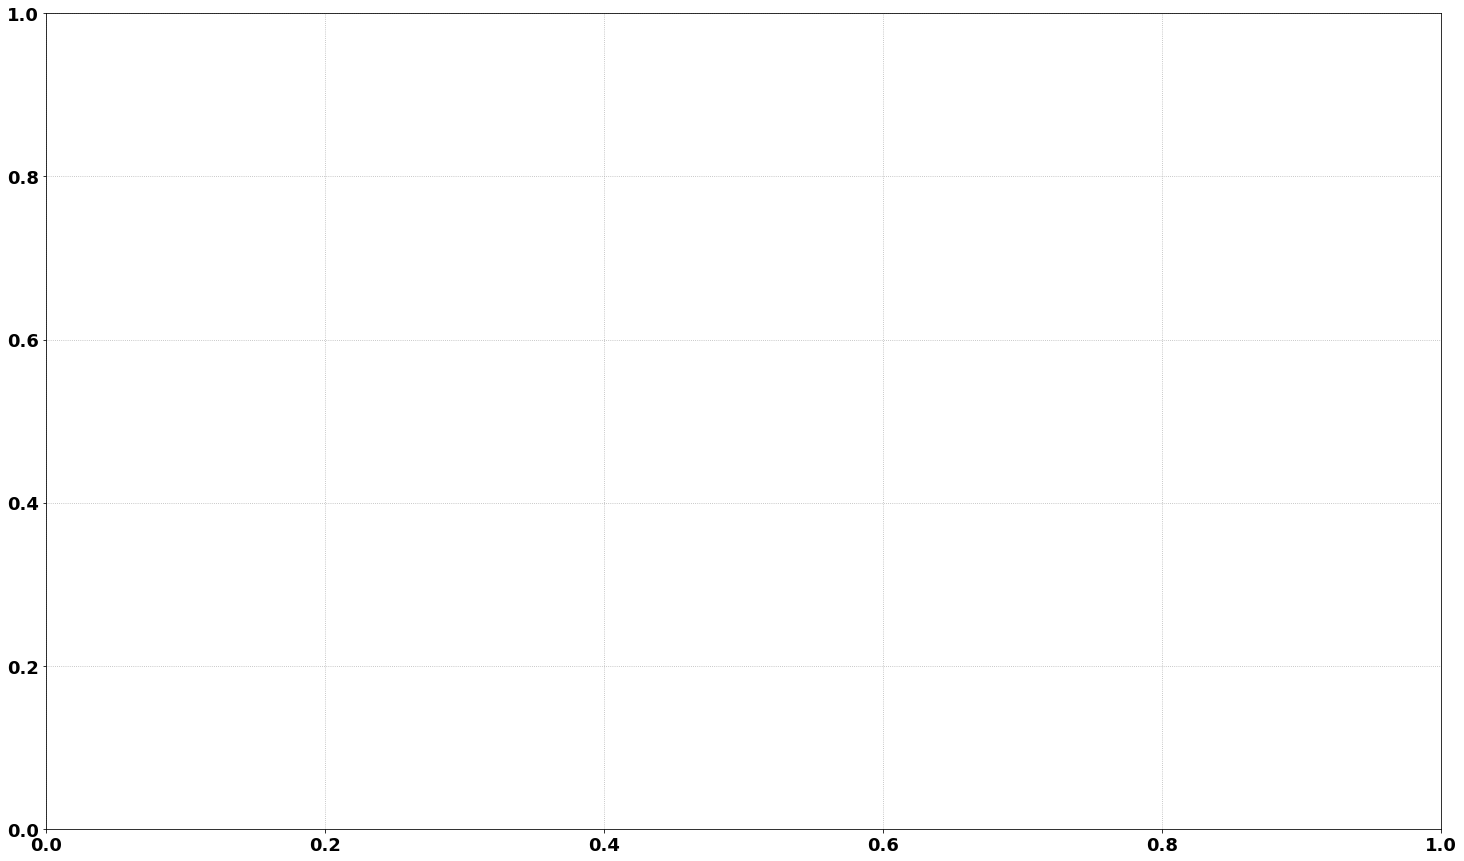

In [41]:
fig = plt.figure(figsize=(25,15))

ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(filtered_correlation))*(1./fs_wav1),filtered_correlation)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of Full Recording and White Noise')

plt.show()
plt.close(fig)

In [42]:
np.where(filtered_correlation==np.max(np.abs(filtered_correlation[:800000])))[0]*(1./fs_wav1)

NameError: name 'filtered_correlation' is not defined

In [43]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

# Attempt at FIR filter

In [20]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = fs_wav0
x = test_wav.copy()
t = np.arange(len(x))*(1/fs_wav0)

NameError: name 'test_wav' is not defined

In [21]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 5000.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

NameError: name 'x' is not defined

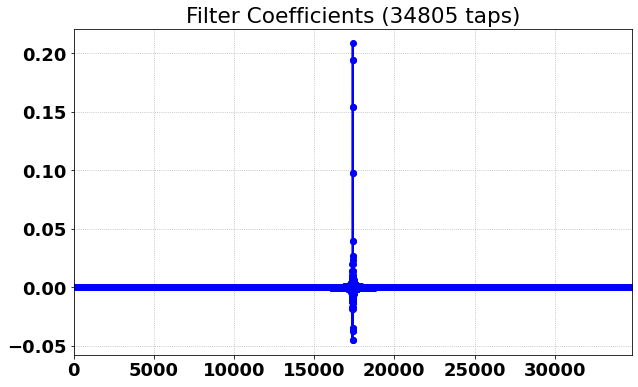

In [22]:
#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

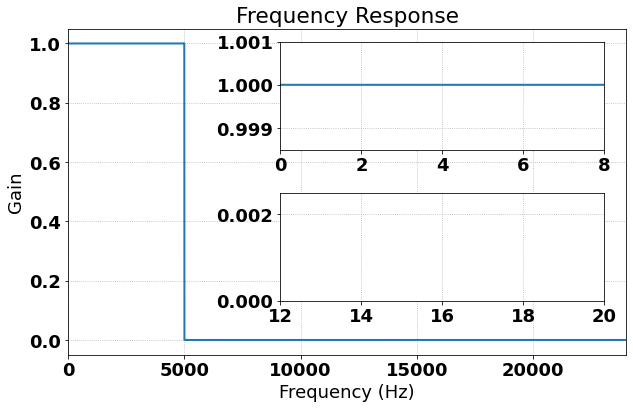

In [23]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

In [24]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

NameError: name 't' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(25,15))

ax = fig.add_subplot(1,1,1)
ax.plot(t-delay,filtered_x)
ax.set_xlabel('Tau [s]')
ax.set_ylabel('Rxy')
ax.set_title('Cross-Correlation of Full Recording and White Noise')

plt.show()
plt.close(fig)

In [ ]:
fig = plt.figure(figsize=(25,15))

plt.specgram(filtered_x,Fs=fs_wav0)
plt.show()

In [ ]:
play(filtered_x, fs_wav1)

In [ ]:
filtered_n6gn = filtered_x.copy()

In [ ]:
filtered_template = filtered_x.copy()

In [ ]:
np.cor

# v_max, v_min -> change the contrast

# substract the mean of the recording from the recording to eliminate the constant DC and time-ticks